# Environment setup

In [1]:
# pipeline.ipynb  — master orchestrator
# -------------------------------------------------------------
# Ensure the project root is on the Python path so we can import
# our local modules (feature_engineering.py, pca_baseline.py, clustering.py)
import sys, pathlib, os
from IPython.display import Image, display

# In Jupyter, just use the directory where the notebook lives
PROJECT_ROOT = pathlib.Path(os.getcwd()).resolve()
sys.path.append(str(PROJECT_ROOT))

DATA_DIR = PROJECT_ROOT / "data"
DATA_DIR.mkdir(exist_ok=True)

print("Project root:", PROJECT_ROOT)
print("Data dir:", DATA_DIR)


Project root: /Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project
Data dir: /Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/data


# Run feature engineering

In [2]:
import feature_engineering  # must expose main()

parquet_path = DATA_DIR / "sp500_features.parquet"

if not parquet_path.exists():
    print("[INFO]   sp500_features.parquet not found — running feature engineering …")
    feature_engineering.main()
else:
    print("[SKIP]   Feature engineering already done.")

[INFO]   sp500_features.parquet not found — running feature engineering …
[INFO] Retrieving S&P 500 ticker list...
[INFO] Downloading 5y of price data for 503 tickers...
[INFO] Engineering features...
[DONE] Feature matrix saved -> /Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/data/sp500_features.csv (rows: 628,411)


# Run PCA + log‑reg baseline


[STAGE]  PCA + baseline
====== Logistic Regression Baseline Metrics: ======
  accuracy: 0.6532
 precision: 0.5862
    recall: 0.6893
        f1: 0.6083
              precision    recall  f1-score   support

        down       0.44      0.73      0.55     17057
     neutral       0.87      0.62      0.73     78036
          up       0.44      0.71      0.55     18518

    accuracy                           0.65    113611
   macro avg       0.59      0.69      0.61    113611
weighted avg       0.74      0.65      0.67    113611

{'pca_variance': '/Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/figures/pca_variance.png', 'confusion_matrix': '/Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/figures/confusion_matrix.png', 'logreg_roc': '/Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/figures/logreg_roc.png'}


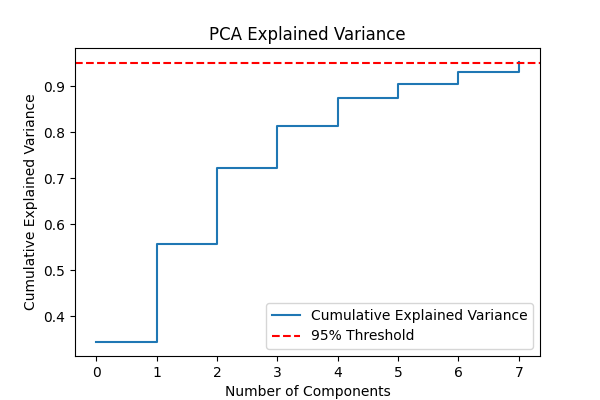

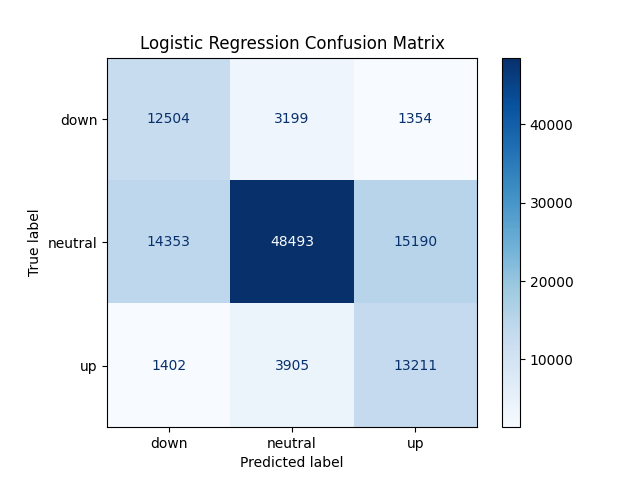

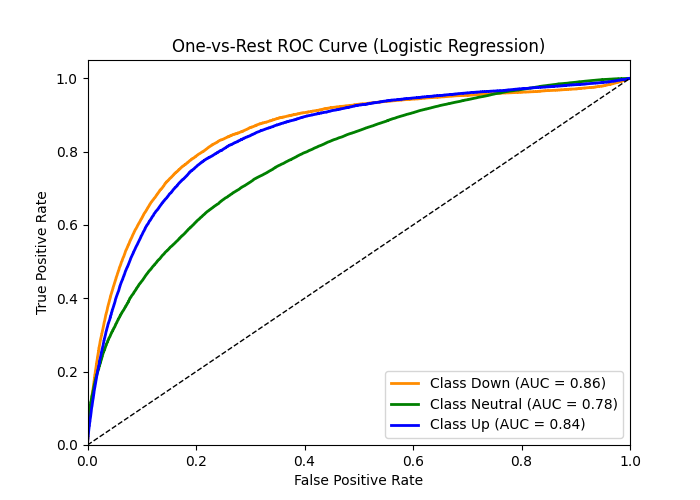

In [3]:
import pca_baseline  # must expose main()

print("\n[STAGE]  PCA + baseline")
plots = pca_baseline.main()   # prints metrics and writes data/pca_features.parquet (parquet for simplicity)

print(plots)
display(Image(filename=plots['pca_variance']))
display(Image(filename=plots['confusion_matrix']))
display(Image(filename=plots['logreg_roc']))


[STAGE]  Random Forest baseline
[INFO] Fitting the model
[INFO] Complete
[INFO] Determining best threshold combination
[INFO] Best macro F1: 0.6455 at thresholds up=0.35, down=0.32499999999999996
====== Random Forest Baseline Metrics: ======
  accuracy: 0.7322
 precision: 0.6393
    recall: 0.6533
        f1: 0.6455
              precision    recall  f1-score   support

        down       0.54      0.61      0.57     17057
     neutral       0.82      0.80      0.81     78036
          up       0.55      0.55      0.55     18518

    accuracy                           0.73    113611
   macro avg       0.64      0.65      0.65    113611
weighted avg       0.74      0.73      0.73    113611

[RESULT] Random Forest Baseline: 
{'pca_variance': '/Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/figures/randomforest_pca_variance.png', 'confusion_matrix': '/Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/figures/randomforest_confusion_matrix.png', 'logreg_roc': '

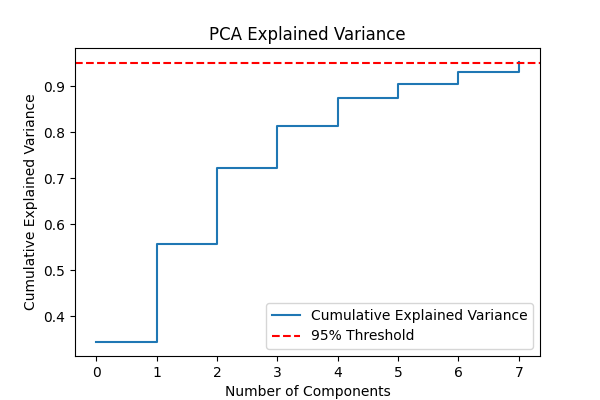

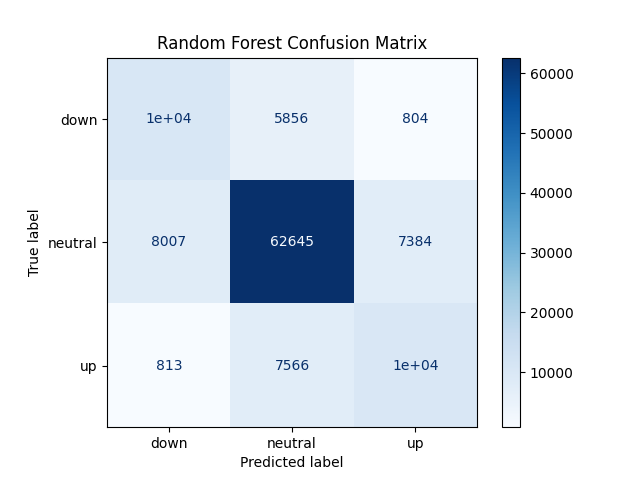

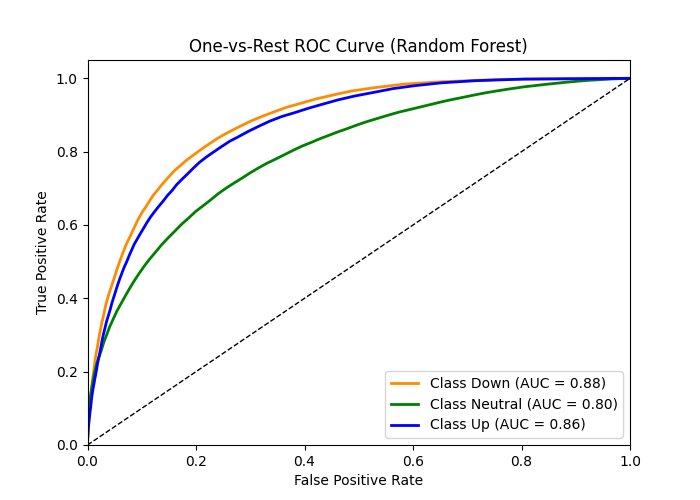

In [4]:
import rf_baseline  # must expose main()

print("\n[STAGE]  Random Forest baseline")
plots = rf_baseline.main()   # prints metrics and writes data/pca_features.parquet (parquet for simplicity)

print("[RESULT] Random Forest Baseline: ")
# for label, path in plots.items():
#     print(f"[PLOT]   {label} → {path}")

print(plots)
display(Image(filename=plots['pca_variance']))
display(Image(filename=plots['confusion_matrix']))
display(Image(filename=plots['logreg_roc']))

# Run clustering


[STAGE]  Clustering
=== Clustering Summary ===
      k_chosen: 3
    silhouette: 0.23709477030198822
davies_bouldin: 1.5998028234321826
[RESULT] Clustering metrics: {'k_chosen': 3, 'silhouette': 0.23709477030198822, 'davies_bouldin': 1.5998028234321826}
[PLOT]   elbow_plot → /Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/figures/kmeans_elbow.png
[PLOT]   scatter_plot → /Users/zacharycoates/Desktop/Northeastern/SM25/DM/final project/figures/pca_clusters.png


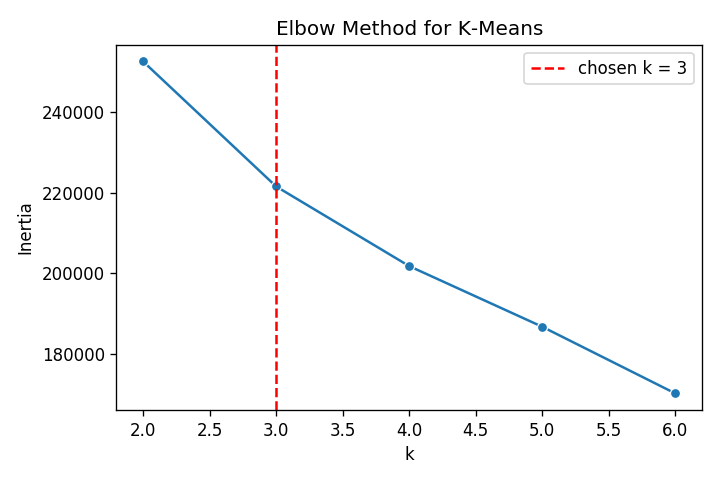

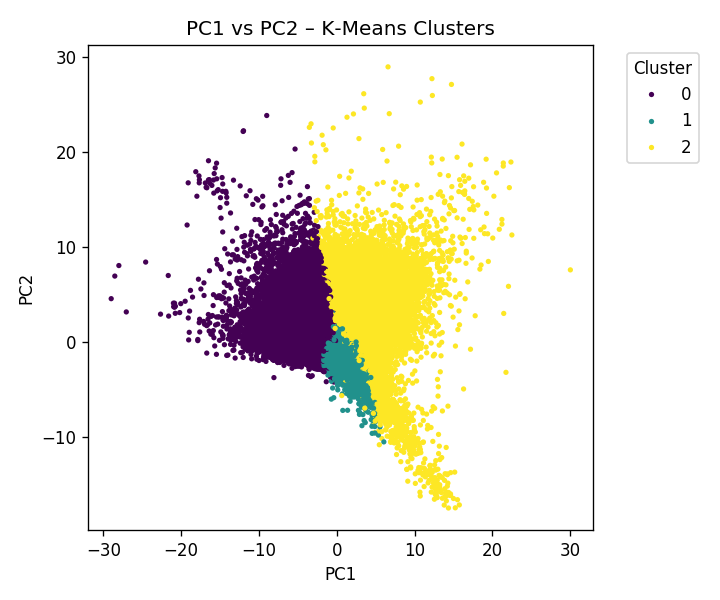

In [5]:
from clustering import run as clustering_run

print("\n[STAGE]  Clustering")
cluster_metrics, plots = clustering_run()

print("[RESULT] Clustering metrics:", cluster_metrics)
for label, path in plots.items():
    print(f"[PLOT]   {label} → {path}")

display(Image(filename=plots["elbow_plot"]))
display(Image(filename=plots["scatter_plot"]))

# Quick sanity check

In [6]:
import pandas as pd

final_path = DATA_DIR / "cluster.parquet"
df_final = pd.read_parquet(final_path)
print(f"Final dataset shape: {df_final.shape}")
print(df_final.head())

Final dataset shape: (567996, 10)
          0         1         2         3         4         5         6  \
0  3.613437 -0.642152 -0.759226  0.681279  0.188212 -0.815303 -0.098684   
1  2.588302  3.908667  3.943505  2.750960 -1.024888 -2.490674  3.982856   
2  0.085622 -0.630815 -0.186533  0.230614  0.309850 -0.822301 -0.295446   
3  0.049342 -1.391267 -0.791406  0.045983 -0.540532  0.044836  0.294257   
4  5.270580 -0.349174 -0.090898  2.227221  0.221074 -0.865545 -0.216186   

          7  label  cluster_label  
0  0.193723      1              1  
1 -1.225473      1              1  
2 -0.069225      1              0  
3 -0.097097      1              0  
4  0.177179      1              1  


# MLP Neural Network Classifier


[STAGE]  MLP Neural Network Classifier
Loading and preparing data...
Shape: (567996, 10)
Class distribution 0/1/2 → 15.8% / 67.1% / 17.1%
Train/Test split: (454396, 8)  /  (113600, 8)

Creating and training MLP model…


C:\Users\benji\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")



Performance Metrics:
--------------------------------------------------
  accuracy: 0.8644
 precision: 0.6477
    recall: 0.3623
        f1: 0.4647
[RESULT] MLP Performance Metrics:
         accuracy: 0.8644
         precision: 0.6477
         recall: 0.3623
         f1: 0.4647
[RESULT] Classification Report:
         Class 0 (No significant increase) - Precision: 0.8860, Recall: 0.9618, F1: 0.9224
         Class 1 (Significant increase) - Precision: 0.6477, Recall: 0.3623, F1: 0.4647
         Overall Accuracy: 0.8644

[PLOTS]  MLP Visualizations:
         training_history
         loss_curve
         validation_scores
         confusion_matrix


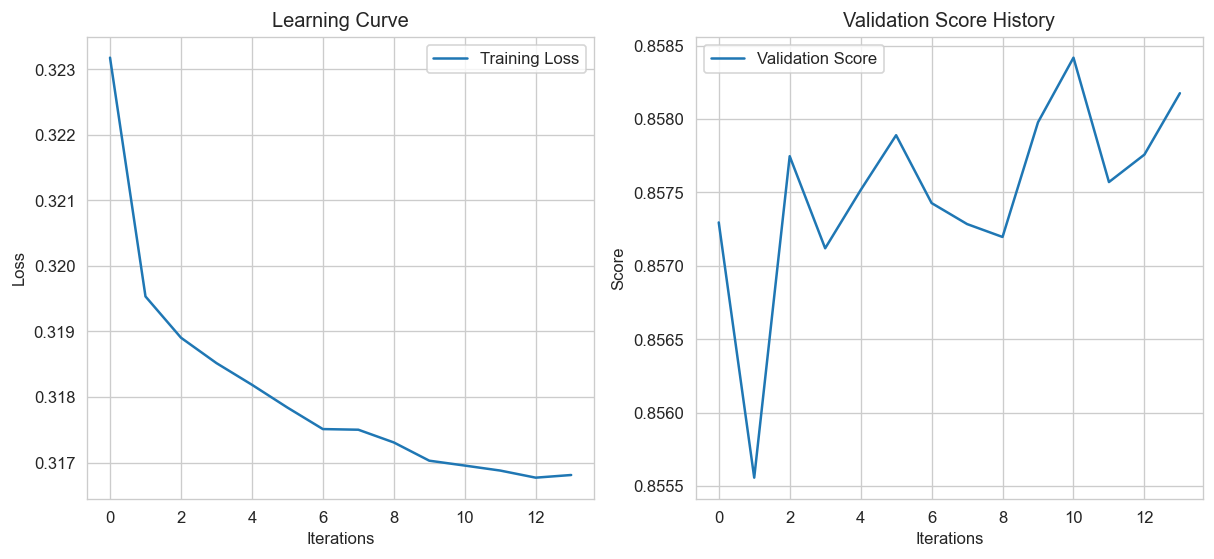

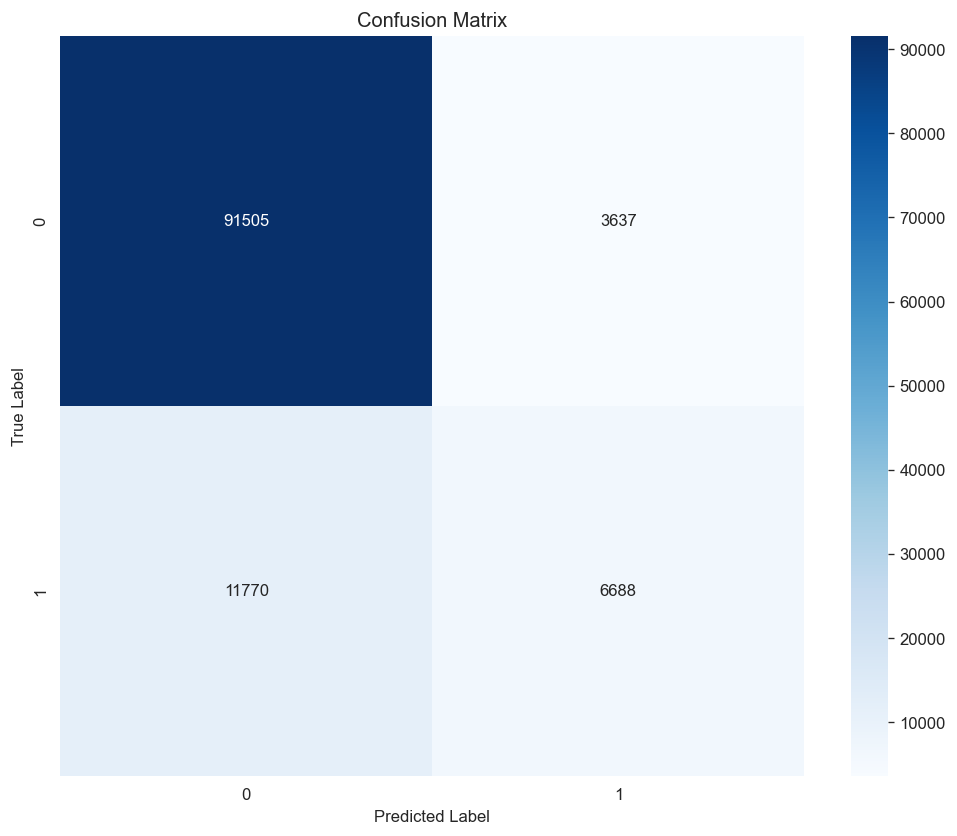

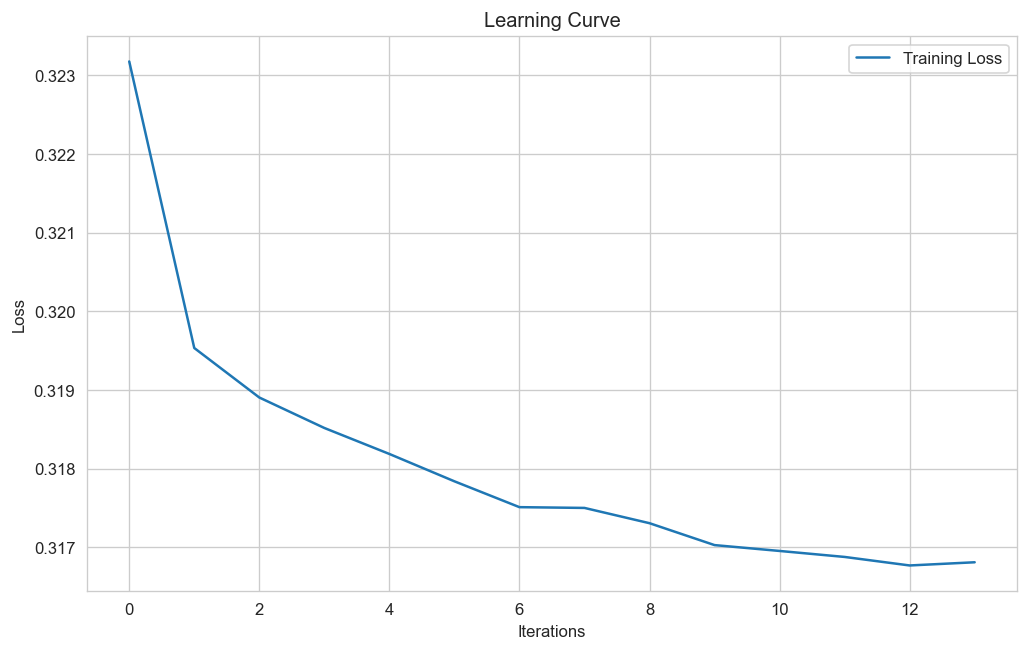

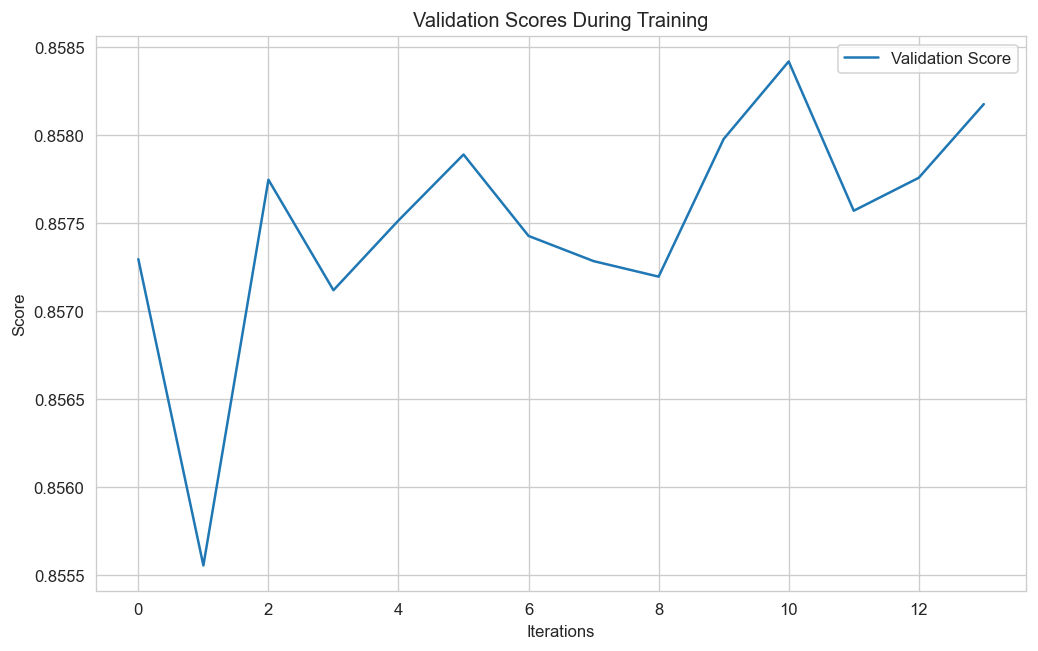

In [7]:
from mlp_classifier import train_and_evaluate
from IPython.display import Image, display

print("\n[STAGE]  MLP Neural Network Classifier")
metrics, report, plot_paths = train_and_evaluate()

print("[RESULT] MLP Performance Metrics:")
for metric, value in metrics.items():
    print(f"         {metric}: {value:.4f}")

print("[RESULT] Classification Report:")
print(f"         Class 0 (No significant increase) - Precision: {report['0']['precision']:.4f}, Recall: {report['0']['recall']:.4f}, F1: {report['0']['f1-score']:.4f}")
print(f"         Class 1 (Significant increase) - Precision: {report['1']['precision']:.4f}, Recall: {report['1']['recall']:.4f}, F1: {report['1']['f1-score']:.4f}")
print(f"         Overall Accuracy: {report['accuracy']:.4f}")

print("\n[PLOTS]  MLP Visualizations:")
for plot_type in plot_paths:
    print(f"         {plot_type}")

# Display all plots inline
display(Image(filename=plot_paths["training_history"]))
display(Image(filename=plot_paths["confusion_matrix"]))
display(Image(filename=plot_paths["loss_curve"]))
display(Image(filename=plot_paths["validation_scores"]))

# Pipeline Complete!

All stages have been executed successfully:

1. **Feature Engineering** - Generated comprehensive technical indicators
2. **PCA + Baseline** - Dimensionality reduction and logistic regression baseline  
3. **Clustering** - K-means clustering for market regime identification
4. **MLP Neural Network** - Deep learning classifier for stock movement prediction

All results, metrics, and visualizations are now available in one consolidated pipeline!